In [ ]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict, Literal, Annotated
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver  # persistent storage in ram

load_dotenv()

True

In [2]:
model = ChatGroq(model="deepseek-r1-distill-llama-70b")

In [3]:
class JokeState(TypedDict):
    joke: str
    topic: str
    explanation: str

In [4]:
def generate_joke(state: JokeState) -> str:

    prompt = f"Generate a joke about {state['topic']}."
    response = model.invoke(prompt).content
    return {"joke": response}

In [5]:
def generate_explanation(state: JokeState) -> str:

    prompt = f"Explain the joke: {state['joke']}."
    response = model.invoke(prompt).content
    return {"explanation": response}

In [6]:
graph = StateGraph(JokeState) 

graph.add_node("generate_joke",generate_joke)
graph.add_node("generate_explanation",generate_explanation)

graph.add_edge(START,"generate_joke")
graph.add_edge("generate_joke","generate_explanation")
graph.add_edge("generate_explanation",END)

checkpoint = InMemorySaver()

workflow = graph.compile(checkpointer=checkpoint)
    

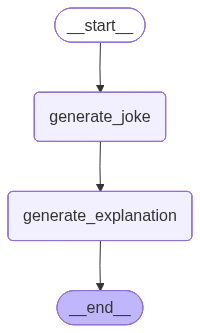

In [7]:
workflow

In [8]:
# Execute the workflow with an initial state

initial_state = {'topic': 'Indian Army'}

config = {"configurable": {"thread_id":"1"}}
workflow.invoke(initial_state, config=config)

{'joke': "<think>\nAlright, the user has asked me to generate a joke about the Indian Army. I need to make sure the joke is respectful and not offensive.\n\nFirst, I should think about the Indian Army's values and symbols. The lion is a strong symbol, often associated with bravery.\n\nMaybe I can play on the idea of bravery and something that lions do. How about a lion seeing a soldier and feeling nervous?\n\nI can structure it as a question and answer to make it a classic joke format. Let me put that together.\n\nI should keep it simple and clear, ensuring it's appropriate for all audiences. That should work well.\n</think>\n\nSure! Here's a light-hearted joke:\n\nWhy did the lion feel nervous when it saw an Indian Army soldier?  \nBecause it knew the soldier was the *real* king of the jungle! 😄",
 'topic': 'Indian Army',
 'explanation': '<think>'}

In [9]:
workflow.get_state(config)

StateSnapshot(values={'joke': "<think>\nAlright, the user has asked me to generate a joke about the Indian Army. I need to make sure the joke is respectful and not offensive.\n\nFirst, I should think about the Indian Army's values and symbols. The lion is a strong symbol, often associated with bravery.\n\nMaybe I can play on the idea of bravery and something that lions do. How about a lion seeing a soldier and feeling nervous?\n\nI can structure it as a question and answer to make it a classic joke format. Let me put that together.\n\nI should keep it simple and clear, ensuring it's appropriate for all audiences. That should work well.\n</think>\n\nSure! Here's a light-hearted joke:\n\nWhy did the lion feel nervous when it saw an Indian Army soldier?  \nBecause it knew the soldier was the *real* king of the jungle! 😄", 'topic': 'Indian Army', 'explanation': '<think>'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0887ac-0480-60ac-8002-403

## Intermediate values

In [10]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'joke': "<think>\nAlright, the user has asked me to generate a joke about the Indian Army. I need to make sure the joke is respectful and not offensive.\n\nFirst, I should think about the Indian Army's values and symbols. The lion is a strong symbol, often associated with bravery.\n\nMaybe I can play on the idea of bravery and something that lions do. How about a lion seeing a soldier and feeling nervous?\n\nI can structure it as a question and answer to make it a classic joke format. Let me put that together.\n\nI should keep it simple and clear, ensuring it's appropriate for all audiences. That should work well.\n</think>\n\nSure! Here's a light-hearted joke:\n\nWhy did the lion feel nervous when it saw an Indian Army soldier?  \nBecause it knew the soldier was the *real* king of the jungle! 😄", 'topic': 'Indian Army', 'explanation': '<think>'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0887ac-0480-60ac-8002-40

In [11]:
initial_state = {
    'topic': 'Pasta'}

config1 = {"configurable": {"thread_id":"2"}}
workflow.invoke(initial_state, config=config1)

{'joke': '<think>\nOkay, so I need to come up with a pasta joke. Hmm, where do I start? Well, pasta has a lot of different types, like spaghetti, fettuccine, penne, and so on. Maybe I can play with the names or some characteristic of pasta.\n\nLet me think about common joke structures. Maybe a pun? Puns are great for jokes because they play on words. So, I should think of a word related to pasta and see if it has a double meaning.\n\nWait, "penne" sounds a bit like "pen." That could work. So, if I can make a joke where penne is confused with a pen. How would that go? Maybe something like, "Why did the penne go to the party?" Because it heard it was a "pen-neat" event. Wait, that\'s kind of forced.\n\nAlternatively, "Why did the penne go to school?" To get more "saucy" knowledge. Hmm, that\'s not bad. Sauce is definitely related to pasta, so that could work.\n\nOr maybe "Why don\'t skeletons eat pasta?" Because they don\'t have the "guts" for it. But that\'s more of a skeleton joke than